In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

In [2]:
class1=pd.read_csv('class1.txt',header=None)
class1.columns=["column1","column2"] 
class1['class']=list(0 for i in range(1000))
class2=pd.read_csv("class2.txt",header=None)
class2.columns=['column1','column2']
class2['class']=list(1 for i in range(1000))
df=class1.append(class2)
X_train, X_test, y_train, y_test =train_test_split(df, df['class'], test_size=0.2)
X_train.to_csv('train.csv ')
X_test.to_csv('test.csv')

In [3]:
train_data=pd.read_csv('train.csv ', index_col=0)
test_data=pd.read_csv('test.csv', index_col=0)

test_class0,test_class1=test_data.groupby(by='class')
train_class0 , train_class1=train_data.groupby(by='class')

test_data.drop(['class'],axis=1,inplace=True)
train_class0[1].drop(['class'],axis=1,inplace = True)
train_class1[1].drop(['class'],axis=1,inplace = True)

<AxesSubplot:xlabel='column1', ylabel='column2'>

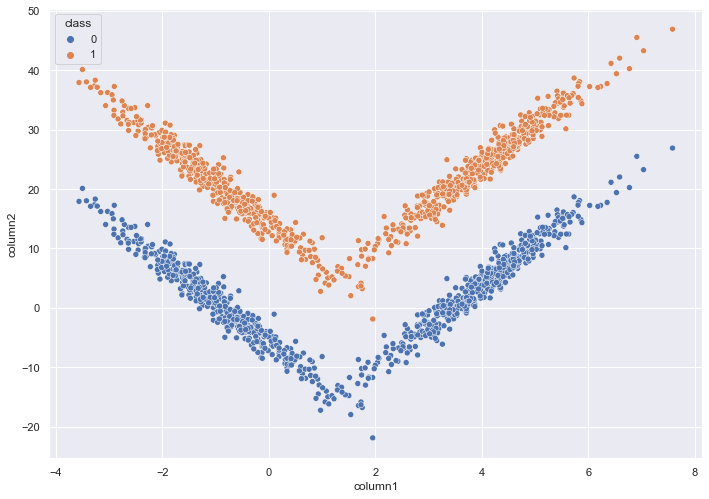

In [4]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.scatterplot(x=df.column1, y=df.column2, hue="class", data = df)

In [5]:
def comp_confmat(actual, predicted):

    classes = np.unique(actual) # extract the different classes
    matrix = np.zeros((len(classes), len(classes))) # initialize the confusion matrix with zeros

    for i in range(len(classes)):
        for j in range(len(classes)):

            matrix[i, j] = np.sum((actual == classes[i]) & (predicted == classes[j]))

    return matrix

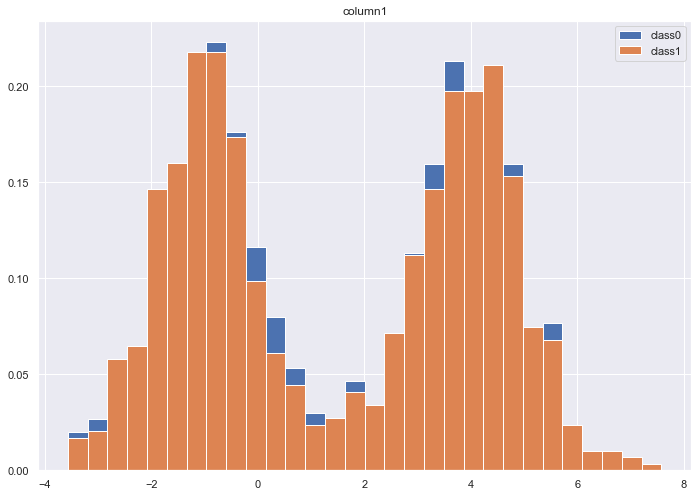

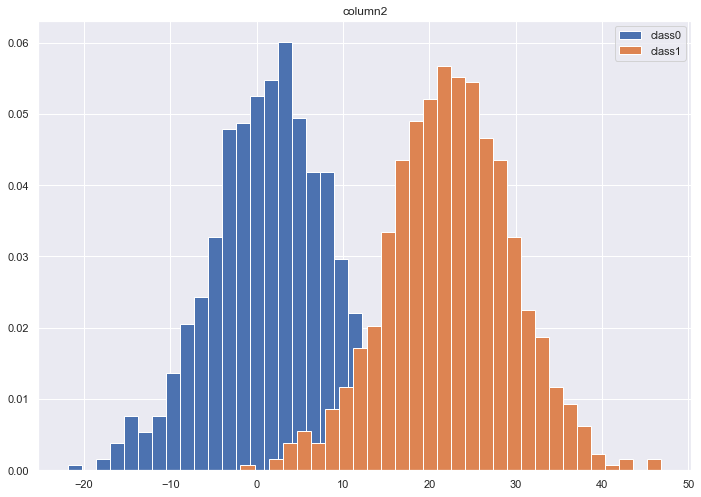

In [6]:
x_class0_column1, bins_class0_column1, p = plt.hist(train_class0[1]["column1"],bins=30,label="class0", density=True)
x_class1_column1, bins_class1_column1, p = plt.hist(train_class1[1]["column1"],bins=30,label='class1', density=True)
plt.title("column1")
plt.legend()
plt.show()


x_class0_column2, bins_class0_column2, p = plt.hist(train_class0[1]["column2"],bins=30,label='class0', density=True)
x_class1_column2, bins_class1_column2, p = plt.hist(train_class1[1]["column2"],bins=30,label='class1', density=True)
plt.title("column2")
plt.legend()
plt.show()

In [7]:
def classifier_Normalized_histograms(data):
    data_point1=data[0]
    data_point2=data[1]
    
    pro_class0_column1=0
    pro_class0_column2=0
    pro_class1_column1=0
    pro_class1_column2=0
    
    for i in range(30):
        if data_point1 >= bins_class0_column1[i] and data_point1 < bins_class0_column1[i+1]:
            pro_class0_column1=float(x_class0_column1[i])
        if data_point1 >=bins_class1_column1[i] and data_point1 < bins_class1_column1[i+1]:
            pro_class1_column1=float(x_class1_column1[i])
        if data_point2 >= bins_class0_column2[i] and data_point2 < bins_class0_column2[i+1]:
            pro_class0_column2=float(x_class0_column1[i])
        if data_point2 >= bins_class1_column2[i] and data_point2 < bins_class1_column2[i+1]:
            pro_class1_column2=float(x_class1_column2[i])
            
    if pro_class0_column1*pro_class0_column2 > pro_class1_column1*pro_class1_column2:
        return 0 
    else:
        return 1

y_pred=[]
for i in range(400):
    data=list(test_data.iloc[i])
    y_pred.append(classifier_Normalized_histograms(data))
       
print('confusion matrix of normalized histogram classifier is \n')
print(comp_confmat(y_test,y_pred))

print('\n')
confusion_matrix = comp_confmat(y_test,y_pred)
correct_classified=sum(np.diagonal(confusion_matrix))
total_samples=np.sum(confusion_matrix)
a1=correct_classified/total_samples
print('accuracy of normalized histogram classifier is \n',round(a1,3))

confusion matrix of normalized histogram classifier is 

[[190.   1.]
 [ 81. 128.]]


accuracy of normalized histogram classifier is 
 0.795
